In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to /home/manikanta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/manikanta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/manikanta/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/manikanta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/manikanta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/manikanta/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


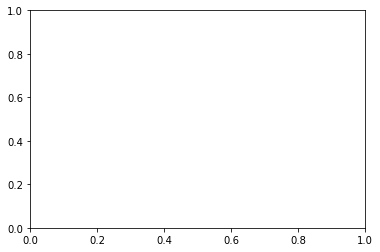

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly as py
from plotly.offline import iplot


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import nltk
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score
import nltk
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
# Importing plotly and cufflinks in offline mode
import plotly.express as px
import plotly.offline
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
# Figure&Display options
%matplotlib inline
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (12, 8)
pd.set_option('max_colwidth', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#import colorama
#from colorama import Fore, Style # maakes strings colored
from termcolor import colored
import ipywidgets
from ipywidgets import interact
#import pandas_profiling
#from pandas_profiling.report.presentation.flavours.html.templates import create_html_assets


In [26]:

df=pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
x=df.shape
df.head()


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length...",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


In [27]:
df.shape

(23486, 11)

Unnamed 0, Clothing ID and Title column are unnecessary columns. So we can remove these columns from dataframe.

In [28]:
df.drop(["Unnamed: 0","Clothing ID","Title"],axis=1,inplace=True)
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,34,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length...",5,1,4,General,Dresses,Dresses
2,60,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...,3,0,0,General,Dresses,Dresses
3,50,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,47,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


In [29]:
df.dtypes

Age                         int64
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

Analyzing the amount of null values in each attribute and removing the null vales to reduce the size and increasing the performance.

In [30]:
df.isnull().sum()

Age                          0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
dtype: int64

In [31]:
df.dropna(subset=["Review Text","Division Name","Department Name","Class Name"],inplace=True)

In [32]:
y=df.shape


In [33]:
print("Deleted")
print(x[0]-y[0],"Rows")
print(x[1]-y[1],"Columns")

Deleted
858 Rows
3 Columns


DATA VISUALISATION

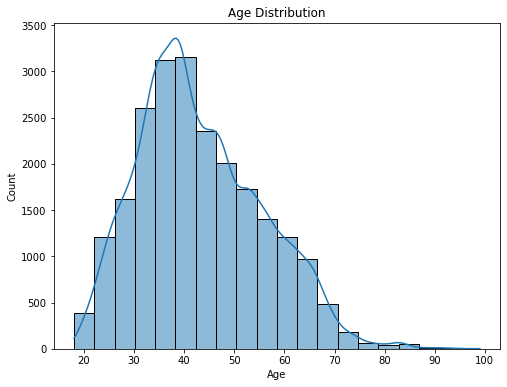

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

So most of the women are in the range of between 35 to 45.

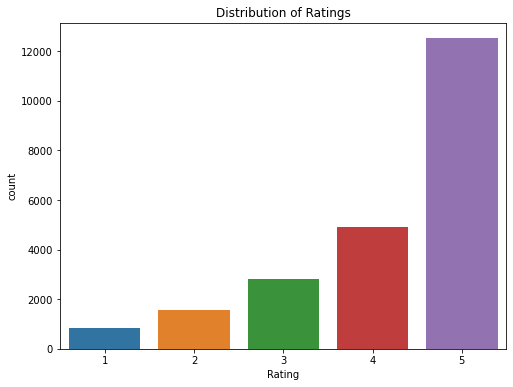

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=df)
plt.title('Distribution of Ratings')
plt.show()

Most of them has given a maximum rating of 5

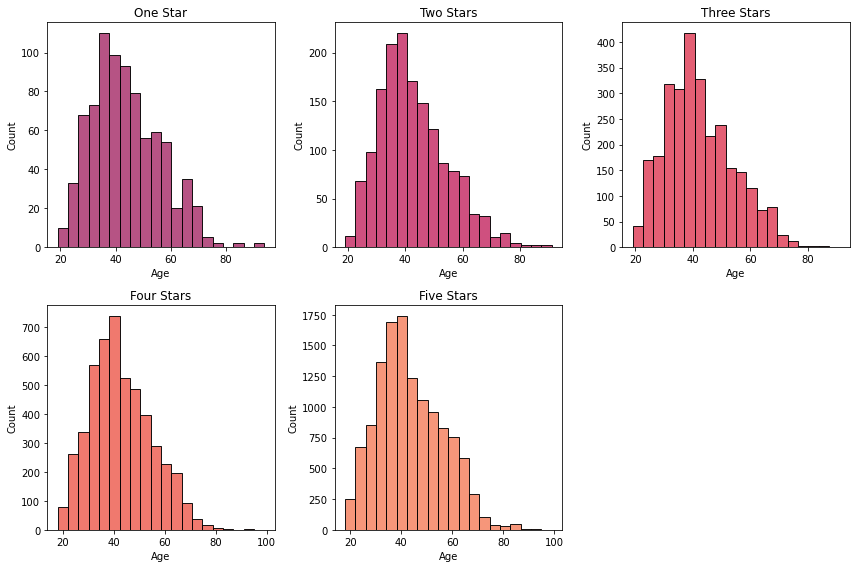

In [36]:
rocket = plt.get_cmap("rocket")
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(12, 8))
one = df[df["Rating"] == 1]["Age"]
two = df[df["Rating"] == 2]["Age"]
three = df[df["Rating"] == 3]["Age"]
four = df[df["Rating"] == 4]["Age"]
five = df[df["Rating"] == 5]["Age"]

ax1 = sns.histplot(one, ax=axes[0][0], kde=False, bins=20, color=rocket(100))
ax1.set_title('One Star')

ax2 = sns.histplot(two, ax=axes[0][1], kde=False, bins=20, color=rocket(120))
ax2.set_title('Two Stars')

ax3 = sns.histplot(three, ax=axes[0][2], kde=False, bins=20, color=rocket(140))
ax3.set_title('Three Stars')

ax4 = sns.histplot(four, ax=axes[1][0], kde=False, bins=20, color=rocket(160))
ax4.set_title('Four Stars')

ax5 = sns.histplot(five, ax=axes[1][1], kde=False, bins=20, color=rocket(180))
ax5.set_title('Five Stars')

axes[-1, -1].axis("off")

plt.tight_layout()


So,


*   1 star has been given by women mostly at age above 30 with a count of 100+ .
*   2 star has been given by women mostly at age above 35 with a count of 200+ .
*   3 star has been given by women mostly at age nearly 40 with a count of 400+  .
*   4 star has been given by women mostly at age above 35 with a count of 700+ .
*   5 star has been given by women mostly at age above 35 with a count of 1700+ .







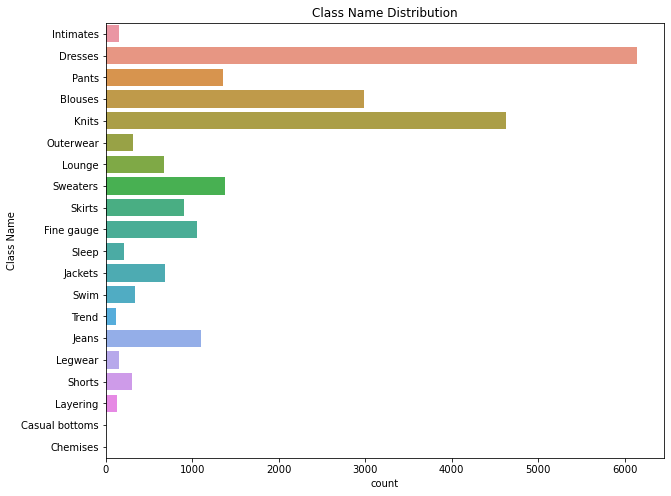

In [37]:
plt.figure(figsize=(10, 8))
sns.countplot(y='Class Name', data=df)
plt.title('Class Name Distribution')
plt.show()

So, Dresses are purchased at most followed by knits, blouses, pants, sweaters and so on.

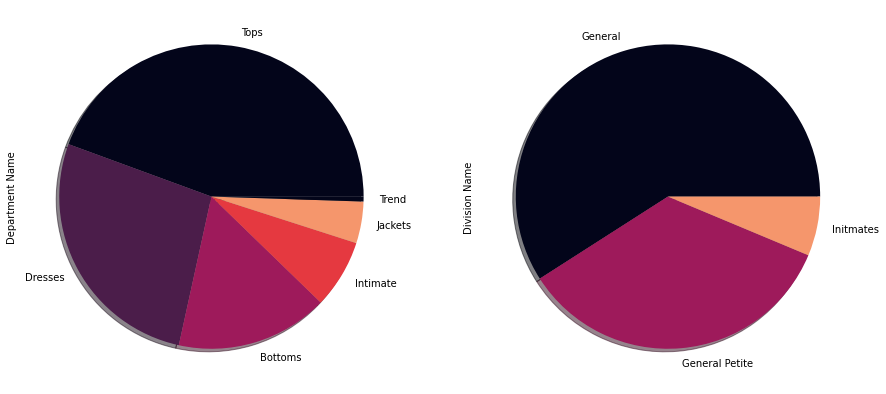

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 21))
ax=df["Department Name"].value_counts().plot.pie(ax = axes[0], shadow=True, colors=rocket(np.arange(5)*50))
ax1=df["Division Name"].value_counts().plot.pie(ax = axes[1], shadow=True, colors=rocket(np.arange(5)*100))



*   Based on Department, Dresses are purchased at most
*   Based on Division,  General are purchased at most.



TEXT CLEANING


1.   Tokenization and Noise Removal
               Splitting of words into n-grams/tokens is called as tokenization.
               Removal of unwanted punctuations for clear words and improved nlp performance is called as Noise Removal
2.   Lexicon Normalization
               Lexicon normalization is to prepare text data for analysis or processing by reducing it to a common and more manageable format.
               Lexicon normalization is often a preprocessing step in NLP tasks.
    





In [39]:

def cleaning_fsa(data):

 import re
 #1. Remove Puncs
 # \w typically matches [A-Za-z0-9_]
 text = re.sub('[^\w\s]','', data)

 #2. Tokenize
 text_tokens = word_tokenize(text.lower())

 #3. Remove numbers
 tokens_without_punc = [w for w in text_tokens if w.isalpha()]

 #4. Removing Stopwords
 stop_words = stopwords.words('english')
 tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

 #5. lemma
 text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

 #joining
 return " ".join(text_cleaned)

In [40]:
cleaning_fsa("Hi, This is Deepachandran..")

LookupError: 
**********************************************************************
  Resource [93momw-1.4[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('omw-1.4')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/omw-1.4[0m

  Searched in:
    - '/home/manikanta/nltk_data'
    - '/home/manikanta/anaconda3/nltk_data'
    - '/home/manikanta/anaconda3/share/nltk_data'
    - '/home/manikanta/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
df['Review Text']=df['Review Text'].apply(cleaning_fsa)

In [ ]:
df['Review Text'][0:2]

Sentiment Polarity analysis for detection of positive and negative reviews.

In [ ]:
from textblob import TextBlob
res = TextBlob("This movie is extremely amazing")
print(res.sentiment.polarity)
res=TextBlob("This movie is very boring.")
print(res.sentiment.polarity)
res=TextBlob("This movie is above average.")
print(res.sentiment.polarity)

In [ ]:
df["Polarity"] = df["Review Text"].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:

plt.figure(figsize=(8, 6))
sns.histplot(df['Polarity'], bins=20, kde=True,color="#FFB90F")
plt.title('Age Distribution')
plt.show()

So , positive reviews with a polarity of 0.25 is given by most of the women with a count of 5000+

In [ ]:
df.head()

As per the census, When deciding whether to engage with a business, it has been indicated that 3.3 stars out of 5 are the lowest rating customers are likely to consider.

So rating greater than 3 will be considered as positive, else considered as negative.

In [ ]:
positive = (df["Rating"] >3)
negative = (df["Rating"] <= 3)
df["Review Type"] = " "
df["Review Type"][positive] = "Positive"

df["Review Type"][negative] = "Negative"

df.head()

In [ ]:
review_type = {"Positive": 1, "Negative": 0}
df["Review Type"] = df["Review Type"].map(review_type)
df.head()

Forming a new column called as NEW_Recommended Index. If review type is 1 and recommended index is also 1 then, new recommended index is also equal to 1.

In [ ]:
df['NEW_Recommended INDEX']=0
df['NEW_Recommended INDEX'][(df["Review Type"]==1) & (df["Recommended IND"]==1)]=1
df

In [ ]:
len(df[df["Recommended IND"]==1])

In [ ]:
len(df[df['NEW_Recommended INDEX']==1])

In [ ]:
len(df[df["Recommended IND"]==0])


In [ ]:

len(df[df['NEW_Recommended INDEX']==0])

In [ ]:
df[(df['NEW_Recommended INDEX']==1)&(df['Recommended IND']==0)].head()

In [ ]:
df[(df['NEW_Recommended INDEX']==0)&(df['Recommended IND']==1)].head()

So I filtered out the negative reviews with recommendation index of 1. Hence the prediction will be better.

In [ ]:
cor = df.corr()
sns.heatmap(cor, xticklabels = cor.columns, yticklabels = cor.columns, annot = True)


In [ ]:
df["NEW_Recommended INDEX"].value_counts()


As per the analysis, Some negative reviews are given with recommendation index of 1.So based on review type and recommendation index, if review type and recommendation index is equal to 1, then new recommendation index is also equal to one. Hence a better recommendation index is produced for a better prediction

ML PREDICTION

Collection of negative words

In [ ]:
neg_words = " ".join(df[df["NEW_Recommended INDEX"] == 0]['Review Text']).split()
neg_words

Collection of Positive Words

In [ ]:
from pandas.core.arrays.base import PositionalIndexer
pos_words = " ".join(df[df["NEW_Recommended INDEX"] == 1]['Review Text']).split()
pos_words

In [ ]:
all_words=" ".join(df["Review Text"])
all_words[:100]


Analysis of postive and negative words with highest frequency using wordcloud

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", max_words =100).generate(all_words)
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
wordcloud = WordCloud(background_color="white", max_words =50, colormap='cool').generate(str(pos_words))
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
wordcloud = WordCloud(background_color="white", max_words =50, colormap='gist_heat').generate(str(neg_words))
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


ML PREDICTION

In [ ]:

from sklearn.model_selection import train_test_split


In [ ]:
X = df["Review Text"]
y= df["NEW_Recommended INDEX"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)


Count Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [ ]:
print(X_train_count)

TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [ ]:
def eval(model, X_train, X_test):
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  print("Test_Set")
  print(classification_report(y_test, y_pred))
  print("Train_Set")
  print(classification_report(y_train, y_pred_train))
  #fig, ax = plt.subplots(figsize=(8, 8))
  cm=confusion_matrix(y_test,y_pred)
  disp=ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()


# Logistic Regression

Count-Vectorizer

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
log.fit(X_train_count,y_train)


In [ ]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)


In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
 'precision-0': make_scorer(precision_score, pos_label=0),
 'recall-0': make_scorer(recall_score, pos_label=0),
 'f1-0': make_scorer(f1_score, pos_label=0),
 'precision-1': make_scorer(precision_score, pos_label=1),
 'recall-1': make_scorer(recall_score, pos_label=1),
 'f1-1': make_scorer(f1_score, pos_label=1)
 }

for i, j in custom_scorer.items():
  model = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
  scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
  if i == "recall-1":
    log_count_rec = scores
  elif i == "f1-1":
    log_count_f1 = scores
  elif i == "accuracy":
    log_count_acc = scores
  print(f" {i:20} score for count : {scores}\n")


In [ ]:

from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
 LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101),
 classes=log.classes_,
 per_class=True,
cmap="Set1"
 )
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();


In [ ]:
log_AP_count = viz.score_

TF-IDF Vectorizer

In [ ]:

log = LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

In [ ]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
 'precision-0': make_scorer(precision_score, pos_label=0),
 'recall-0': make_scorer(recall_score, pos_label=0),
 'f1-0': make_scorer(f1_score, pos_label=0),
 'precision-1': make_scorer(precision_score, pos_label=1),
 'recall-1': make_scorer(recall_score, pos_label=1),
 'f1-1': make_scorer(f1_score, pos_label=1)
 }

for i, j in custom_scorer.items():
  model = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
  scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
  if i == "recall-1":
    log_count_rec = scores
  elif i == "f1-1":
    log_count_f1 = scores
  elif i == "accuracy":
    log_count_acc = scores
  print(f" {i:20} score for count : {scores}\n")

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
 LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101),
 classes=log.classes_,
 per_class=True,
cmap="Set1"
 )
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();


In [ ]:
log_AP_tfidf = viz.score_


# NAIVE BAYES

COUNT VECTORIZER

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_count, y_train)

In [ ]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

In [ ]:

custom_scorer = {'accuracy': make_scorer(accuracy_score),
 'precision-0': make_scorer(precision_score, pos_label=0),
 'recall-0': make_scorer(recall_score, pos_label=0),
 'f1-0': make_scorer(f1_score, pos_label=0),
 'precision-1': make_scorer(precision_score, pos_label=1),
 'recall-1': make_scorer(recall_score, pos_label=1),
 'f1-1': make_scorer(f1_score, pos_label=1)
 }
for i, j in custom_scorer.items():
  model = MultinomialNB()
  scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
  if i == "recall-1":
    nb_count_rec = scores
  elif i == "f1-1":
    nb_count_f1 = scores
  elif i == "accuracy":
    nb_count_acc = scores
  print(f" {i:20} score for count : {scores}\n")


In [ ]:
viz = PrecisionRecallCurve(
 MultinomialNB(),
classes=nb.classes_,
 per_class=True,
cmap="Set1"
 )
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
nb_AP_count = viz.score

TF-IDF Vectorizer

In [ ]:

from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB()
nb.fit(X_train_tf_idf, y_train)


In [ ]:

print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

In [ ]:

custom_scorer = {'accuracy': make_scorer(accuracy_score),
 'precision-0': make_scorer(precision_score, pos_label=0),
 'recall-0': make_scorer(recall_score, pos_label=0),
 'f1-0': make_scorer(f1_score, pos_label=0),
 'precision-1': make_scorer(precision_score, pos_label=1),
 'recall-1': make_scorer(recall_score, pos_label=1),
 'f1-1': make_scorer(f1_score, pos_label=1)
 }
for i, j in custom_scorer.items():
  model = BernoulliNB()
  scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
  if i == "recall-1":
    nb_tfidf_rec = scores
  elif i == "f1-1":
    nb_tfidf_f1 = scores
  elif i == "accuracy":
    nb_tfidf_acc = scores
  print(f" {i:20} score for tfidf : {scores}\n")


In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
 MultinomialNB(),
classes=nb.classes_,
 per_class=True,
cmap="Set1"
 )
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')
viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();


# SVM

COUNT VECTORIZER

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
svc.fit(X_train_count,y_train)

In [ ]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)


In [ ]:

custom_scorer = {'accuracy': make_scorer(accuracy_score),
 'precision-0': make_scorer(precision_score, pos_label=0),
 'recall-0': make_scorer(recall_score, pos_label=0),
 'f1-0': make_scorer(f1_score, pos_label=0),
 'precision-1': make_scorer(precision_score, pos_label=1),
 'recall-1': make_scorer(recall_score, pos_label=1),
 'f1-1': make_scorer(f1_score, pos_label=1)
 }
for i, j in custom_scorer.items():
  model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
  scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
  if i == "recall-1":
    svc_count_rec = scores
  elif i == "f1-1":
    svc_count_f1 = scores
  elif i == "accuracy":
    svc_count_acc = scores
  print(f" {i:20} score for count : {scores}\n")

In [ ]:
viz = PrecisionRecallCurve(
 LinearSVC(C=0.01, class_weight="balanced", random_state=101),
 classes=svc.classes_,
 per_class=True,
cmap="Set1"
 )
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
svc_AP_count = viz.score

TF-IDF VECTORIZER

In [ ]:

svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
svc.fit(X_train_tf_idf, y_train)


In [ ]:

print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
 'precision-0': make_scorer(precision_score, pos_label=0),
 'recall-0': make_scorer(recall_score, pos_label=0),
 'f1-0': make_scorer(f1_score, pos_label=0),
 'precision-1': make_scorer(precision_score, pos_label=1),
 'recall-1': make_scorer(recall_score, pos_label=1),
 'f1-1': make_scorer(f1_score, pos_label=1)
 }
for i, j in custom_scorer.items():
  model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
  scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
  if i == "recall-1":
    svc_tfidf_rec = scores
  elif i == "f1-1":
    svc_tfidf_f1 = scores
  elif i == "accuracy":
    svc_tfidf_acc = scores
  print(f" {i:20} score for tfidf : {scores}\n")


In [ ]:

viz = PrecisionRecallCurve(
 LinearSVC(C=0.01, class_weight="balanced", random_state=101),
 classes=svc.classes_,
 per_class=True,
cmap="Set1"
 )
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
svc_AP_tfidf = viz.score_


# RANDOM FOREST

COUNT VECTORIZER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)


In [ ]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
 'precision-0': make_scorer(precision_score, pos_label=0),
 'recall-0': make_scorer(recall_score, pos_label=0),
 'f1-0': make_scorer(f1_score, pos_label=0),
 'precision-1': make_scorer(precision_score, pos_label=1),
 'recall-1': make_scorer(recall_score, pos_label=1),
 'f1-1': make_scorer(f1_score, pos_label=1)
 }
for i, j in custom_scorer.items():
  model = RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced")
  scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
  if i == "recall-1":
    rf_count_rec = scores
  elif i == "f1-1":
    rf_count_f1 = scores
  elif i == "accuracy":
    rf_count_acc= scores
  print(f" {i:20} score for count : {scores}\n")


In [ ]:

viz = PrecisionRecallCurve(
    RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced"),
 classes=rf.classes_,
 per_class=True,
cmap="Set1"
 )
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:

rf_AP_count = viz.score_



TF-IDF Vectorizer

In [ ]:
rf = RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)


In [ ]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
 'precision-0': make_scorer(precision_score, pos_label=0),
 'recall-0': make_scorer(recall_score, pos_label=0),
 'f1-0': make_scorer(f1_score, pos_label=0),
 'precision-1': make_scorer(precision_score, pos_label=1),
 'recall-1': make_scorer(recall_score, pos_label=1),
 'f1-1': make_scorer(f1_score, pos_label=1)
 }
for i, j in custom_scorer.items():
  model = RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced")
  scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
  if i == "recall-1":
    rf_tfidf_rec = scores
  elif i == "f1-1":
    rf_tfidf_f1 = scores
  elif i == "accuracy":
    rf_tfidf_acc = scores
  print(f" {i:20} score for tfidf : {scores}\n")


In [ ]:

viz = PrecisionRecallCurve(
 RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced"),
 classes=rf.classes_,
 per_class=True,
cmap="Set1"
 )
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
rf_AP_tfidf = viz.score_


# ADABOOST

COUNT VECTORIZER

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_count, y_train)


In [ ]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

In [ ]:

viz = PrecisionRecallCurve(
 AdaBoostClassifier(n_estimators= 500, random_state = 42),
 classes=ada.classes_,
 per_class=True,
cmap="Set1"
 )
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:

ada_AP_count = viz.score_


TF IDF VECTORIZER

In [ ]:
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_tf_idf, y_train)

In [ ]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

In [ ]:
viz = PrecisionRecallCurve(
 AdaBoostClassifier(n_estimators= 500, random_state = 42),
 classes=ada.classes_,
 per_class=True,
cmap="Set1"
 )
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
ada_AP_tfidf = viz.score_


From the above metrics,

In [ ]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count",
  "NaiveBayes_tfidf", "SVM_tfidf",
 "Random Forest_tfidf"],

"F1_Score": [nb_count_f1, log_count_f1, svc_count_f1,
 rf_count_f1, nb_tfidf_f1,
 svc_tfidf_f1, rf_tfidf_f1],

"Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec,
 rf_count_rec,nb_tfidf_rec, svc_tfidf_rec,
 rf_tfidf_rec],
 "Accuracy_Score": [nb_count_acc, log_count_acc, svc_count_acc,
 rf_count_acc,nb_tfidf_acc, svc_tfidf_acc,
 rf_tfidf_acc],

"Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count,
 log_AP_tfidf, svc_AP_tfidf,
 rf_AP_tfidf]})
def labels(ax):

 for p in ax.patches:
  width = p.get_width() # get bar length
  ax.text(width, # set the text at 1 unit right of the bar
  p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
  '{:1.3f}'.format(width), # set variable to display, 2 decimals
  ha = 'left', # horizontal alignment
  va = 'center') # vertical alignment

plt.figure(figsize=(15,30))
plt.subplot(411)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="winter_r")
labels(ax)
plt.subplot(412)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="gist_earth")
labels(ax)


plt.subplot(413)
compare = compare.sort_values(by="Accuracy_Score", ascending=False)
ax=sns.barplot(x="Accuracy_Score", y="Model", data=compare, palette="ocean")
labels(ax)
plt.show();

From the above analysis , Naive Bayes Model with count vectorization is highest in metrics as compared to other models. Hence we can use  Naive Bayes for prediction


In [ ]:
nb = MultinomialNB()
nb.fit(X_train_count, y_train)

In [ ]:
X_train_count

In [ ]:
review1 = "Love this dress"
review2 = "Absolutely wonderful. silky and sexy and comfortable"
review3 = "i initially ordered the petite small (my usual size) but i found this to be outrageously small."
review4 = "I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great comfortable"
review5 = 'This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings.'
review6 = 'I love tracy reese dresses, but this one is not for the very petite.'
review7 = 'I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and loose.'
review8 = 'Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight!'
review9 = "if you are at least average height or taller, this may look good on you."
review10 = "sadly will be returning, but i'm sure i will find something to exchange it for!"
review11 = 'Very comfortable, material is good, cut out on sleeves flattering'
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, review11]

In [ ]:

df_pred = pd.DataFrame(reviews,columns={"Reviews":0})
df_pred


In [ ]:
df_pred["Reviews1"]=df_pred["Reviews"].apply(cleaning_fsa)
df_pred

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

vectorizer.fit_transform(X_train)
Review=vectorizer.transform(df_pred["Reviews1"])



In [ ]:
y=nb.predict(Review)
df_pred["Predicted Recommendation Label"]=y

In [ ]:
df_pred

Actual one

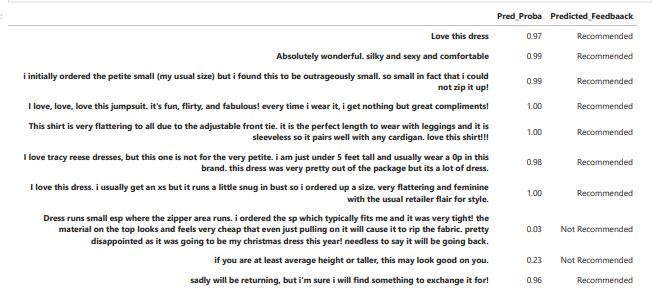